# Hypothesis
* Is there any seasonality in number of customers using the cab service?
* Are people with high wages more willing to use cab services?
* Are people with different age more willing to use cab services?
* Do people use cab services more frequently when they live in a city with bad transportation?
* Do cities with high population-to-Users ratio have higher transactions?

# EDA Recommendation
* The city dataset is not useful in this EDA.
* It is good to have a column that show which city it transact in the Transaction ID csv.
* A column with the size of the city will help to determine people's will to use a cab service or not.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
cab_data = pd.read_csv("C:\Users\YE-JI\Documents\DataSets\Cab_Data.csv")
city = pd.read_csv("DC:\Users\YE-JI\Documents\DataSets\City.csv")
customer_id = pd.read_csv("C:\Users\YE-JI\Documents\DataSets\Customer_ID.csv")
transaction_id = pd.read_csv("C:\Users\YE-JI\Documents\DataSets\Transaction_ID.csv")

In [61]:
# Check the data set in two company is within the same time period
cab_data.head(10)
print(cab_data[cab_data['Company']=='Pink Cab']['Date of Travel'].min())
print(cab_data[cab_data['Company']=='Pink Cab']['Date of Travel'].max())
print(cab_data[cab_data['Company']=='Yellow Cab']['Date of Travel'].min())
print(cab_data[cab_data['Company']=='Yellow Cab']['Date of Travel'].max())

42371
43465
42371
43465


In [62]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [63]:
number_of_customer = customer_id.shape[0]
number_of_customer

49171

In [64]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [65]:
customer_transaction = customer_id.merge(transaction_id, on='Customer ID')
master_data = customer_transaction.merge(cab_data, on="Transaction ID")
master_data['Net Earn'] = master_data['Price Charged'] - master_data['Cost of Trip']
master_data.drop(['KM Travelled'], axis=1, inplace=True)
master_data.head(10)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,Price Charged,Cost of Trip,Net Earn
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,370.95,313.6350,57.3150
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,598.70,317.4228,281.2772
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,792.05,597.4020,194.6480
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,358.52,334.8540,23.6660
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,721.10,467.1192,253.9808
5,27703,Male,27,9237,10324737,Cash,43224,Yellow Cab,ATLANTA GA,138.40,87.5088,50.8912
6,27703,Male,27,9237,10395626,Card,43400,Pink Cab,ATLANTA GA,167.03,141.9340,25.0960
7,28712,Male,53,11242,10000013,Cash,42371,Pink Cab,ATLANTA GA,125.20,97.6320,27.5680
8,28712,Male,53,11242,10079404,Card,42634,Yellow Cab,ATLANTA GA,704.30,494.2080,210.0920
9,28712,Male,53,11242,10186994,Card,42909,Yellow Cab,ATLANTA GA,365.63,246.6564,118.9736


<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='customers'>

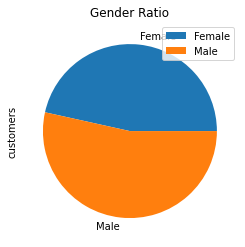

In [80]:
# Ratio of gender
gender_ratio = master_data.drop_duplicates(subset=['Customer ID'])
gender_ratio.groupby('Gender')['Customer ID'].count()
gender_ratio.groupby('Gender').agg('count').plot(kind='pie', y='Customer ID', ylabel='customers', title='Gender Ratio')

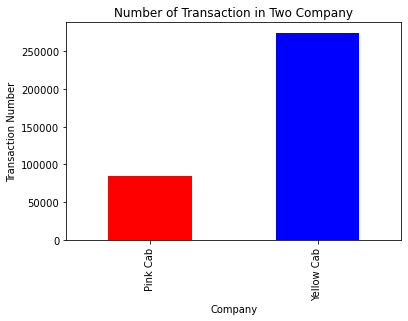

In [67]:
# Number of transaction in both company
master_data.groupby('Company')['Customer ID'].count()
master_data.groupby('Company').agg('count').plot(kind='bar', y='Transaction ID', ylabel="Transaction Number", title='Number of Transaction in Two Company', legend=False, color=['red','blue'])
plt.show()

In [68]:
# number of Customer in both Company
# Yellow Can > Pink Cab
number_customer = master_data.drop_duplicates(subset=['Customer ID', 'Company'])
number_customer.groupby('Company')['Customer ID'].count()

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64

<AxesSubplot:title={'center':'Payment Methods for Companies'}, xlabel='Company,Payment_Mode'>

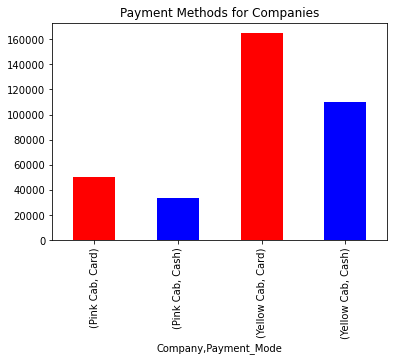

In [78]:
# Payment Method in different company
master_data.groupby(['Company', 'Payment_Mode'])['Customer ID'].count()
master_data.groupby(['Company', 'Payment_Mode'])\
        .agg('count')\
        .plot(kind='bar', 
              y='Transaction ID', 
              title='Payment Methods for Companies', 
              color=['red','blue'], 
              legend=False)

<AxesSubplot:title={'center':'Profit per Transaction'}, xlabel='Company'>

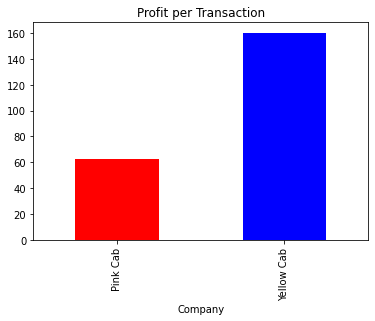

In [73]:
# Average net earn for each cab company
master_data.groupby('Company')['Net Earn'].mean()
master_data.groupby('Company').agg('mean').plot(kind='bar', y='Net Earn', title='Profit per Transaction', color=['red','blue'], legend=False)